# Objective 🎯🎯

The main problem of this project is, my mentor want to see who their customers are who don't maximize the services that have been provided by my internship company. the goal is to give a little warning to the customer to further maximize the services that have been provided

For this reason, based on the data provided, I was asked by my mentor to create a cluster of customers who need to be given a little warning.

so this is the project. Here are the steps I took on the project. 😊😊

# Import Package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Data

In [4]:
data = pd.read_csv("../../Data/clustering/Data Clustering.csv")
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


seeing the data distribution

In [5]:
df.describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,119.000,119.000,119.000
mean,901093.622,13.504,65307.723
std,5418326.938,10.702,338302.602
min,0.000,0.000,0.000
25%,1713.000,4.000,203.000
50%,29912.000,11.000,3509.000
75%,212140.000,20.000,15273.000
max,56674832.000,41.000,3333814.000


Text(0, 0.5, 'Density')

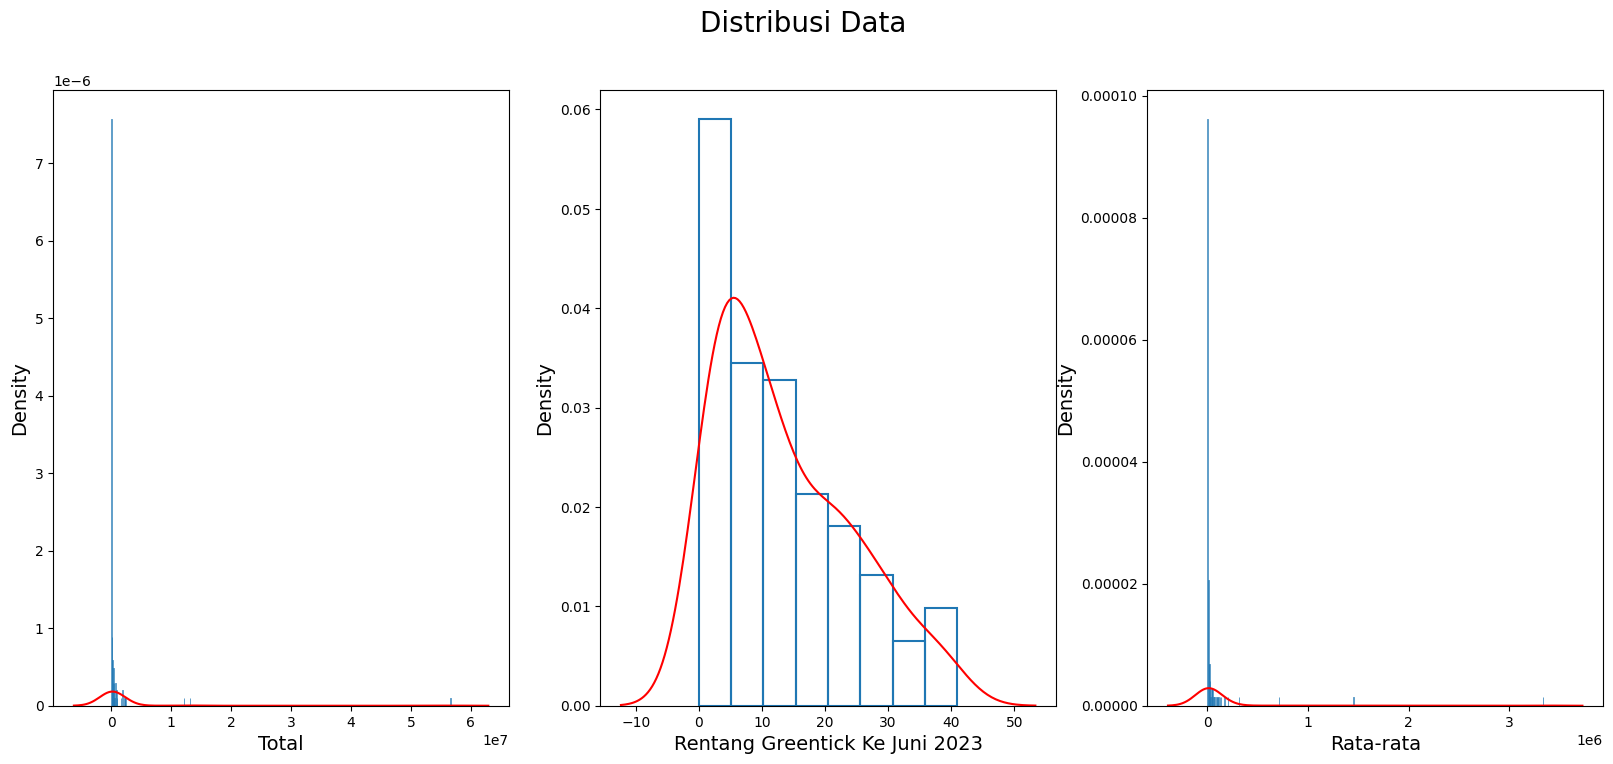

In [6]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

so based on the histogram above, we can see that there is outlier on "rata-rata" and "total" column. the shape of theid bell is so slope. then this column also has a bell shape that is very far from the rightmost point. so I think we really have to try removing the outliers first

# Deleting Outlier

Deleting outlier and see how data distribute

In [7]:
Q1 = data.quantile(0.25);
Q3 = data.quantile(0.75);
IQR=Q3-Q1;

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)];
dfOutlierBawah=data[((data<(Q1-1.5*IQR))).any(axis=1)];
dfOutlierAtas=data[((data>(Q3+1.5*IQR))).any(axis=1)];
df.describe()

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\3402796398.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25);
C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\3402796398.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75);
C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\3402796398.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)];
C:\Users\Jayy\AppData\Local\T

,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,98.000,98.000,98.000
mean,62198.265,12.500,4888.755
std,102077.667,10.164,6912.454
min,0.000,0.000,0.000
25%,368.750,4.000,127.750
50%,15341.000,10.500,1791.500
75%,69343.250,20.000,6763.750
max,454770.000,41.000,26752.000


Text(0, 0.5, 'Density')

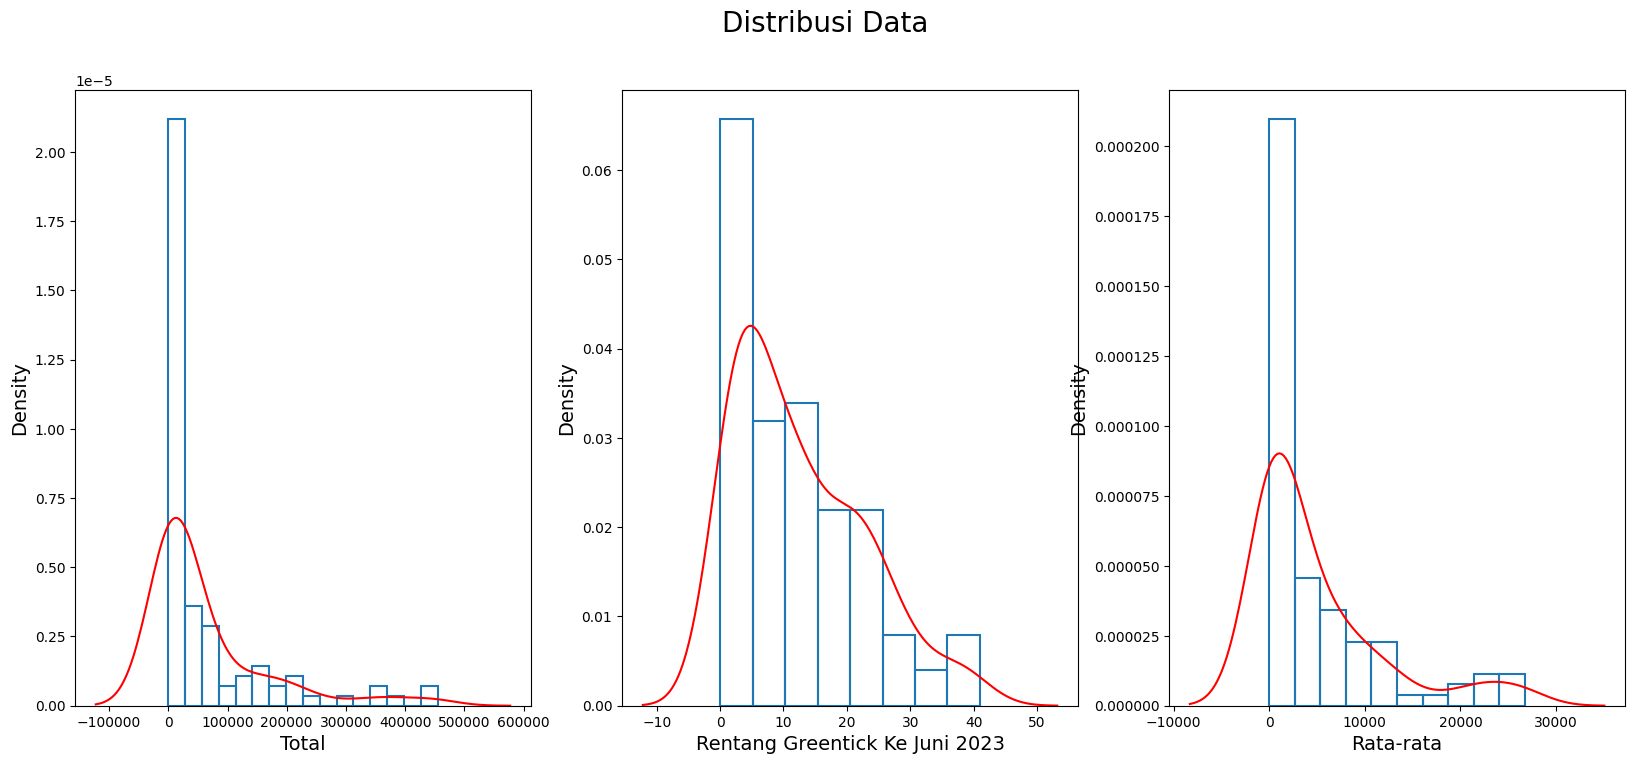

In [8]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

well, from the picture above, it's better to form the histogram. the histogram is not so sloping. then also the more plasticity of the shape of the bell.

then I want to see the data that goes into the upper outlier or the lower outlier

In [9]:
dfOutlierBawah

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata


In [10]:
dfOutlierAtas

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
3,Customer 3,381243,4,95311
8,Customer 8,869292,27,51135
9,Customer 9,1578066,5,315614
16,Customer 16,2156652,29,126862
31,Customer 31,56674832,36,3333814
32,Customer 32,13092618,9,1454736
41,Customer 41,457813,7,65402
42,Customer 42,335288,3,111763
45,Customer 45,330029,8,41254
49,Customer 49,1800386,29,105906


So it turns out that there are no lower data outlier data. there are bottom outlier data.

the next step, I want to label the upper outlier data as a safe 1

In [11]:
dfOutlierAtas['cluster'] = 'safe 1'

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\2535082327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOutlierAtas['cluster'] = 'safe 1'


# Start doing Clustering

## Clustering with all the data

in the clustering process, I selected all the columns to be used as features, then I did scaling the value of each feature using the min max scaler and finding the most optimal cluster using elbow method, chi square, and silhoutte score

In [12]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

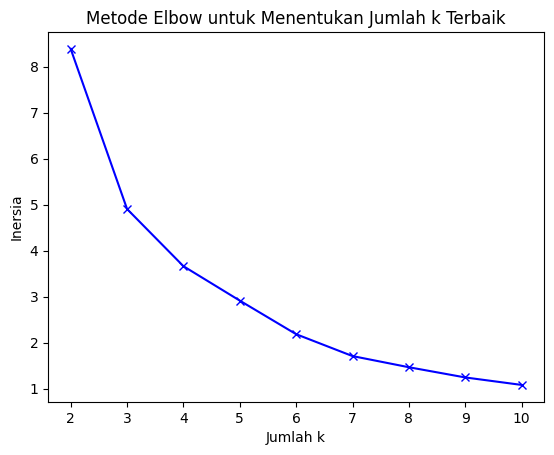

In [13]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [14]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.555513189520705
CH Index Score = 102.29256263424489

Jumlah Cluster = 3
Silhouette Score = 0.512587630672452
CH Index Score = 120.21906501266172

Jumlah Cluster = 4
Silhouette Score = 0.5127888897503192
CH Index Score = 116.84329386377321

Jumlah Cluster = 5
Silhouette Score = 0.5398216670799
CH Index Score = 114.95114971172684

Jumlah Cluster = 6
Silhouette Score = 0.45088178236105453
CH Index Score = 127.52291020776691

Jumlah Cluster = 7
Silhouette Score = 0.47358077396109605
CH Index Score = 138.59293998145932

Jumlah Cluster = 8
Silhouette Score = 0.4625517801641417
CH Index Score = 139.05270701659126

Jumlah Cluster = 9
Silhouette Score = 0.4696202166974392
CH Index Score = 143.77860548445855

Jumlah Cluster = 10
Silhouette Score = 0.4672425160455504
CH Index Score = 146.82529519336853


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.555513189520705

Jumlah Cluster CH Index = 

based on three method before, i found that the optimal number for cluster is 3 so i set the number of cluster to 3 and start doing clustering to the all data

In [15]:
cluster = 3

kmeans = KMeans(n_clusters=cluster, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

0    60
2    23
1    15
Name: cluster, dtype: int64

i found that there is 60 rows data labeled as 1, 23 rows data labeld as 0 and 15 rows data labeled as 2

In [16]:
df.groupby('cluster').describe().transpose()

cluster                                      0          1          2
Total                          count    60.000     15.000     23.000
                               mean  13629.917 260984.333  59255.217
                               std   21042.838 113528.958  56280.895
                               min       0.000  82788.000      0.000
                               25%     151.000 187752.000  11258.500
                               50%    2374.000 222922.000  38275.000
                               75%   18415.500 352259.000 104716.500
                               max   72754.000 454770.000 161923.000
Rentang Greentick Ke Juni 2023 count    60.000     15.000     23.000
                               mean      6.083     18.133     25.565
                               std       4.412      8.526      6.680
                               min       0.000      4.000     16.000
                               25%       2.750     13.000     20.000
                               50%       5.000     20.000     25.000
                               75%      10.000     21.000     28.500
                               max      15.000     38.000     41.000
Rata-rata                      count    60.000     15.000     23.000
                               mean   1966.733  18704.333   3501.261
                               std    2818.487   6010.524   3308.211
                               min       0.000  11084.000      0.000
                               25%      30.250  13092.500    662.500
                               50%     440.000  20375.000   2252.000
                               75%    3391.750  23499.000   6160.500
                               max   12313.000  26752.000   9525.000

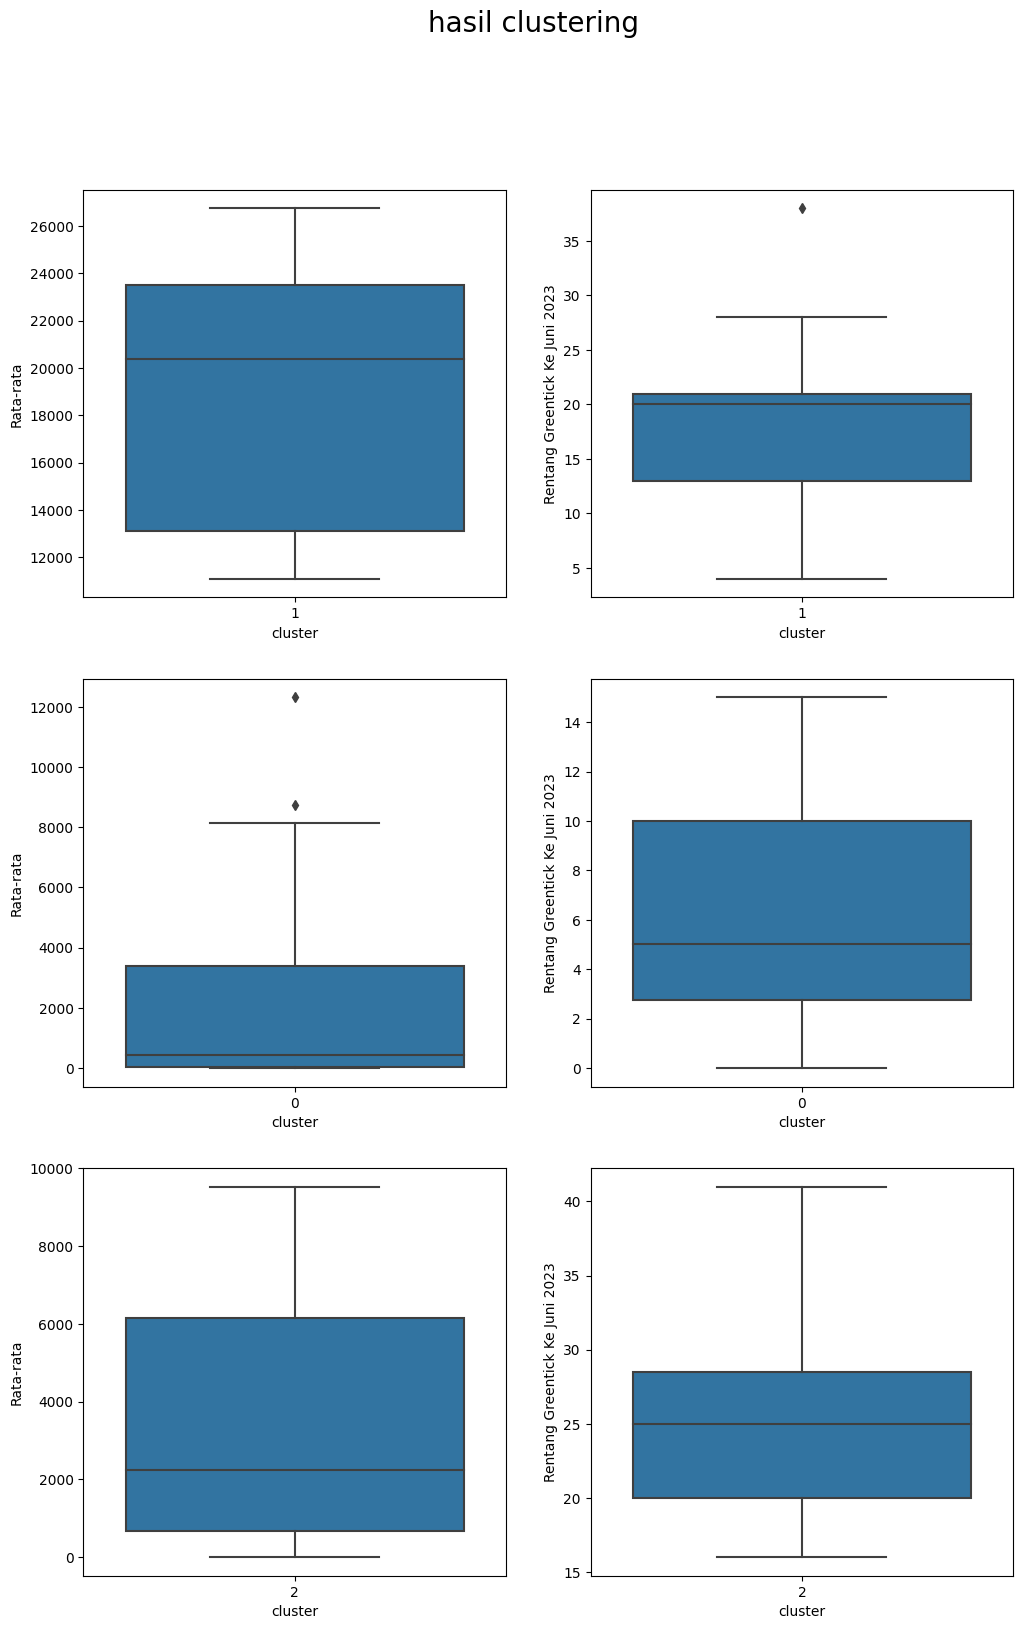

In [17]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(cluster, 2, figsize=(12, cluster*6))
fig.suptitle("hasil clustering", fontsize=20)

for i in range(cluster):
    sns.boxplot(data=df[df['cluster'] == df['cluster'].unique()[i]], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == df['cluster'].unique()[i]], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [18]:
df

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,1
1,Customer 1,20672,3,6891,0
2,Customer 2,17148,4,4287,0
4,Customer 4,10,0,10,0
5,Customer 5,82788,4,20697,1
...,...,...,...,...,...
114,Customer 114,949,7,136,0
115,Customer 115,0,2,0,0
116,Customer 116,222204,20,13071,1
117,Customer 117,0,1,0,0


In [19]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
1,260984.333,18.133,18704.333
2,59255.217,25.565,3501.261
0,13629.917,6.083,1966.733


In [20]:
safe = df[df['cluster'] == 2]
safe['cluster'] = "Safe 2"
safe

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\768613260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safe['cluster'] = "Safe 2"


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
15,Customer 15,136700,22,8042,Safe 2
30,Customer 30,154691,20,9100,Safe 2
34,Customer 34,0,20,0,Safe 2
46,Customer 46,39103,16,2444,Safe 2
48,Customer 48,124871,24,7346,Safe 2
52,Customer 52,56140,16,3509,Safe 2
57,Customer 57,311,20,19,Safe 2
59,Customer 59,159541,25,9385,Safe 2
62,Customer 62,33366,20,1963,Safe 2
64,Customer 64,104298,28,6136,Safe 2


In [21]:
df[df['cluster'] == 0]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,0
2,Customer 2,17148,4,4287,0
4,Customer 4,10,0,10,0
6,Customer 6,61563,5,12313,0
7,Customer 7,541,6,91,0
10,Customer 10,6,4,2,0
11,Customer 11,72754,14,5197,0
12,Customer 12,25989,7,3713,0
17,Customer 17,61245,7,8750,0
18,Customer 18,248,8,31,0


In [22]:
df[df['cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,1
5,Customer 5,82788,4,20697,1
13,Customer 13,228091,20,13418,1
14,Customer 14,393048,21,23121,1
35,Customer 35,454770,23,26752,1
43,Customer 43,222922,21,13114,1
58,Customer 58,346373,28,20375,1
60,Customer 60,187089,7,26727,1
76,Customer 76,440425,38,25908,1
88,Customer 88,188415,20,11084,1


#### after doing a bunch of analysis per cluster, I found that cluster 0 is a danger cluster, 1 is a warning cluster, and 2 is a safe cluster

## Making a sub cluster

after getting 3 major of cluster, i wanna find out is the more detailed cluster inside the major cluster. i doing this becauce i found that based on the the major clustere before, the data is still mix to each other. the way of making cluster is the same as i did before

### Clustering Danger Cluster

In [23]:
df[df['cluster'] == 0]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,0
2,Customer 2,17148,4,4287,0
4,Customer 4,10,0,10,0
6,Customer 6,61563,5,12313,0
7,Customer 7,541,6,91,0
10,Customer 10,6,4,2,0
11,Customer 11,72754,14,5197,0
12,Customer 12,25989,7,3713,0
17,Customer 17,61245,7,8750,0
18,Customer 18,248,8,31,0


In [24]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

Danger = df[df['cluster'] == 0]

X = Danger[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

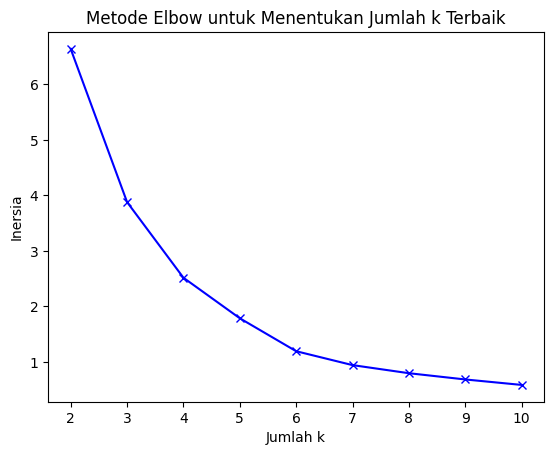

In [25]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [26]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.5481483378721966
CH Index Score = 56.68947662007699

Jumlah Cluster = 3
Silhouette Score = 0.46261562638712694
CH Index Score = 67.92600640950361

Jumlah Cluster = 4
Silhouette Score = 0.5067535557279766
CH Index Score = 78.67801971497667

Jumlah Cluster = 5
Silhouette Score = 0.5218366032175475
CH Index Score = 87.23395324526864

Jumlah Cluster = 6
Silhouette Score = 0.5333418350638777
CH Index Score = 107.96570498530144

Jumlah Cluster = 7
Silhouette Score = 0.5352226671146171
CH Index Score = 114.08884290204215

Jumlah Cluster = 8
Silhouette Score = 0.5359216036084423
CH Index Score = 114.85256870937364

Jumlah Cluster = 9
Silhouette Score = 0.5001814263454724
CH Index Score = 115.78979363999117

Jumlah Cluster = 10
Silhouette Score = 0.49375924484712297
CH Index Score = 118.77414755975607


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.5481483378721966

Jumlah Cluster CH Index 

In [27]:
kmeans = KMeans(n_clusters=2, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

Danger2Cluster = Danger.copy()

Danger2Cluster['cluster'] = kmeans.labels_
Danger2Cluster['cluster'].value_counts()

0    49
1    11
Name: cluster, dtype: int64

In [28]:
danger1 = Danger2Cluster[Danger2Cluster['cluster'] == 1]
danger1['cluster'] = 'danger 1'
danger1

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\2117021986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger1['cluster'] = 'danger 1'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
6,Customer 6,61563,5,12313,danger 1
11,Customer 11,72754,14,5197,danger 1
17,Customer 17,61245,7,8750,danger 1
19,Customer 19,55956,12,4663,danger 1
37,Customer 37,71222,12,5936,danger 1
73,Customer 73,52302,14,3736,danger 1
77,Customer 77,18909,15,1261,danger 1
81,Customer 81,70197,11,6382,danger 1
99,Customer 99,23268,14,1662,danger 1
105,Customer 105,38902,14,2779,danger 1


In [29]:
danger2 = Danger2Cluster[Danger2Cluster['cluster'] == 0]
danger2['cluster'] = 'danger 2'
danger2

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\3877388072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger2['cluster'] = 'danger 2'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,danger 2
2,Customer 2,17148,4,4287,danger 2
4,Customer 4,10,0,10,danger 2
7,Customer 7,541,6,91,danger 2
10,Customer 10,6,4,2,danger 2
12,Customer 12,25989,7,3713,danger 2
18,Customer 18,248,8,31,danger 2
20,Customer 20,189,2,95,danger 2
21,Customer 21,169,0,169,danger 2
22,Customer 22,310,2,155,danger 2


### Clustering Warning Cluster

In [30]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

warning = df[df['cluster'] == 1]

X = warning[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

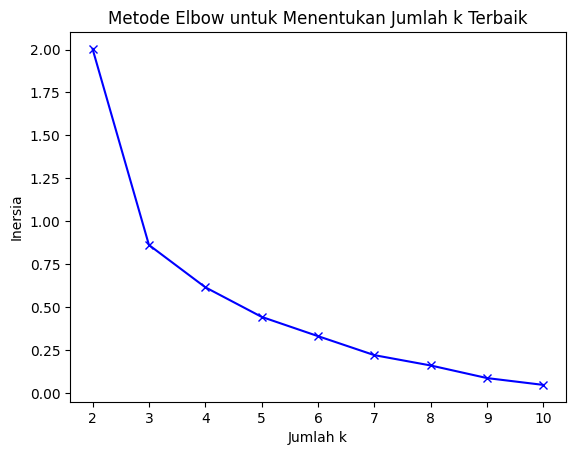

In [31]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [32]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.43893092873828127
CH Index Score = 14.543744497757945

Jumlah Cluster = 3
Silhouette Score = 0.553230932074812
CH Index Score = 23.535947963704455

Jumlah Cluster = 4
Silhouette Score = 0.45690631017897676
CH Index Score = 21.59666680345

Jumlah Cluster = 5
Silhouette Score = 0.4337283249838514
CH Index Score = 21.42098805543931

Jumlah Cluster = 6
Silhouette Score = 0.4210334745882218
CH Index Score = 21.247415918778852

Jumlah Cluster = 7
Silhouette Score = 0.3785648377467327
CH Index Score = 24.28600739720763

Jumlah Cluster = 8
Silhouette Score = 0.3490755740895966
CH Index Score = 25.40707280019182

Jumlah Cluster = 9
Silhouette Score = 0.3526392501899696
CH Index Score = 35.68093381037048

Jumlah Cluster = 10
Silhouette Score = 0.3088983203559949
CH Index Score = 48.94640174338259


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.553230932074812

Jumlah Cluster CH Index = 10
Ni

In [33]:
kmeans = KMeans(n_clusters=4, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

warning4Cluster = warning.copy()

warning4Cluster['cluster'] = kmeans.labels_
warning4Cluster['cluster'].value_counts()

2    6
0    4
1    3
3    2
Name: cluster, dtype: int64

In [34]:
warning2 = warning4Cluster[warning4Cluster['cluster'] == 0]
warning2['cluster'] = 'warning 2'
warning2

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\2484637608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning2['cluster'] = 'warning 2'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
14,Customer 14,393048,21,23121,warning 2
58,Customer 58,346373,28,20375,warning 2
100,Customer 100,291161,20,17128,warning 2
106,Customer 106,358145,15,23877,warning 2


In [35]:
warning3 = warning4Cluster[warning4Cluster['cluster'] == 1]
warning3['cluster'] = 'warning 3'
warning3

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\3845305123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning3['cluster'] = 'warning 3'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
5,Customer 5,82788,4,20697,warning 3
60,Customer 60,187089,7,26727,warning 3
91,Customer 91,202076,9,22453,warning 3


In [36]:
warning4Cluster[warning4Cluster['cluster'] == 2]
warning4 = warning4Cluster[warning4Cluster['cluster'] == 2]
warning4['cluster'] = 'warning 4'
warning4

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\1194063671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning4['cluster'] = 'warning 4'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,warning 4
13,Customer 13,228091,20,13418,warning 4
43,Customer 43,222922,21,13114,warning 4
88,Customer 88,188415,20,11084,warning 4
93,Customer 93,162337,14,11596,warning 4
116,Customer 116,222204,20,13071,warning 4


In [37]:
warning1 = warning4Cluster[warning4Cluster['cluster'] == 3]
warning1['cluster'] = 'warning 1'
warning1

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6804\2748528595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warning1['cluster'] = 'warning 1'


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
35,Customer 35,454770,23,26752,warning 1
76,Customer 76,440425,38,25908,warning 1


3 good, 0 good, 1 warning, 2 terrible  

### Merge all cluster to one

In [38]:
df = pd.concat([dfOutlierAtas, safe, danger1, danger2, warning1, warning2, warning3, warning4], ignore_index=True)
df

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 3,381243,4,95311,safe 1
1,Customer 8,869292,27,51135,safe 1
2,Customer 9,1578066,5,315614,safe 1
3,Customer 16,2156652,29,126862,safe 1
4,Customer 31,56674832,36,3333814,safe 1
...,...,...,...,...,...
114,Customer 13,228091,20,13418,warning 4
115,Customer 43,222922,21,13114,warning 4
116,Customer 88,188415,20,11084,warning 4
117,Customer 93,162337,14,11596,warning 4


In [39]:
df[df['cluster'].astype(str).str.contains('saf', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 3,381243,4,95311,safe 1
1,Customer 8,869292,27,51135,safe 1
2,Customer 9,1578066,5,315614,safe 1
3,Customer 16,2156652,29,126862,safe 1
4,Customer 31,56674832,36,3333814,safe 1
5,Customer 32,13092618,9,1454736,safe 1
6,Customer 41,457813,7,65402,safe 1
7,Customer 42,335288,3,111763,safe 1
8,Customer 45,330029,8,41254,safe 1
9,Customer 49,1800386,29,105906,safe 1


In [40]:
df[df['cluster'].astype(str).str.contains('war', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
104,Customer 35,454770,23,26752,warning 1
105,Customer 76,440425,38,25908,warning 1
106,Customer 14,393048,21,23121,warning 2
107,Customer 58,346373,28,20375,warning 2
108,Customer 100,291161,20,17128,warning 2
109,Customer 106,358145,15,23877,warning 2
110,Customer 5,82788,4,20697,warning 3
111,Customer 60,187089,7,26727,warning 3
112,Customer 91,202076,9,22453,warning 3
113,Customer 0,134921,12,11244,warning 4


In [41]:
df['cluster'].unique()[1]

'Safe 2'

In [42]:
cluster = len(df['cluster'].unique())
cluster

8

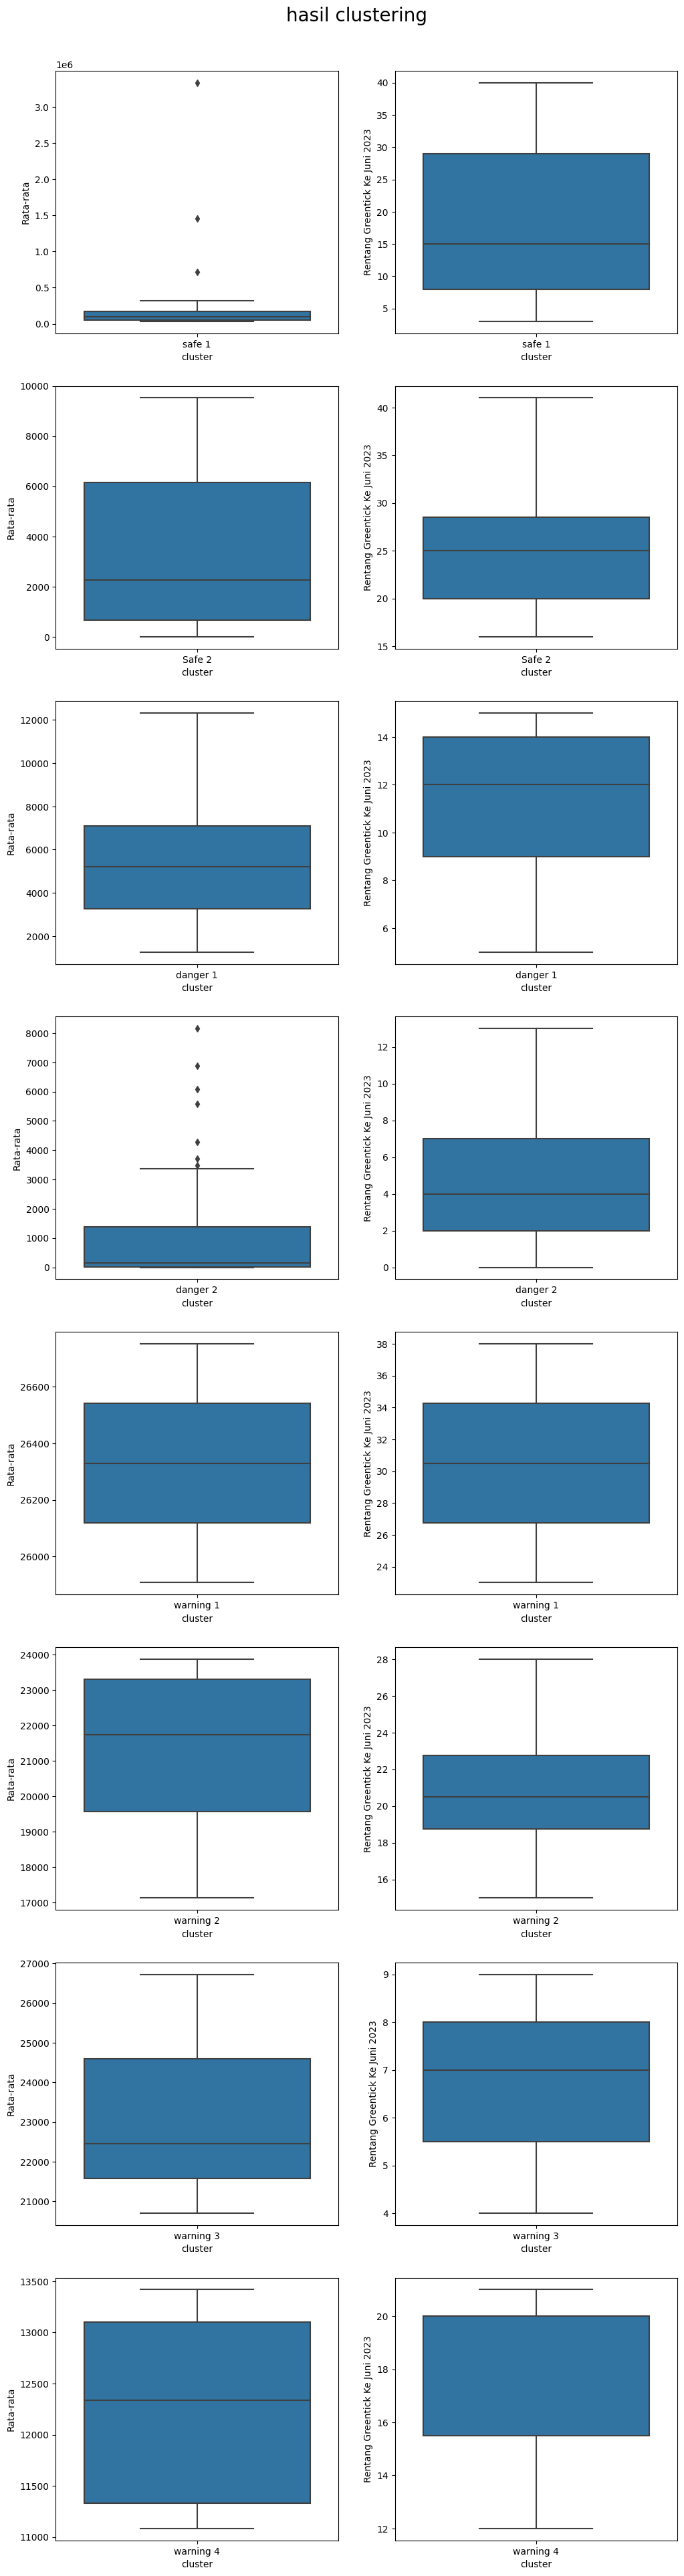

In [43]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(cluster, 2, figsize=(12, cluster*6))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(cluster):
    sns.boxplot(data=df[df['cluster'] == df['cluster'].unique()[i]], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == df['cluster'].unique()[i]], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [44]:
df[df['cluster'].astype(str).str.contains('dan', case=False, na=False)]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
44,Customer 6,61563,5,12313,danger 1
45,Customer 11,72754,14,5197,danger 1
46,Customer 17,61245,7,8750,danger 1
47,Customer 19,55956,12,4663,danger 1
48,Customer 37,71222,12,5936,danger 1
49,Customer 73,52302,14,3736,danger 1
50,Customer 77,18909,15,1261,danger 1
51,Customer 81,70197,11,6382,danger 1
52,Customer 99,23268,14,1662,danger 1
53,Customer 105,38902,14,2779,danger 1


#### so what i did is i making a sub cluster. the number behind the label is show terrible is that. bigger number show the more terrible the data

# Summary

so after doing a disccusion with my mentor, the summary is 
- <b>new customer </b> (small greenticks) => customers in cluster <b> warning 1, warning 2</b>
- <b>old customer </b> (green tick more than 20) => customers in <b>danger 1, danger 2 </b>
- <b>customer priority </b> (big "rata-rata") => customers in <b>safe 1, safe 2, warning 1 </b>
- <b>customer warning </b> (good greenticks, but on "rata-rata" small. The baseline according to my mentor is, at least it has a greenticks score of around 10 and the "rata-rata" is 5000) => customers at <b> warning 3, warning 4 </b>

In [45]:
df['cluster'].value_counts()

danger 2     49
Safe 2       23
safe 1       21
danger 1     11
warning 4     6
warning 2     4
warning 3     3
warning 1     2
Name: cluster, dtype: int64

<Axes: >

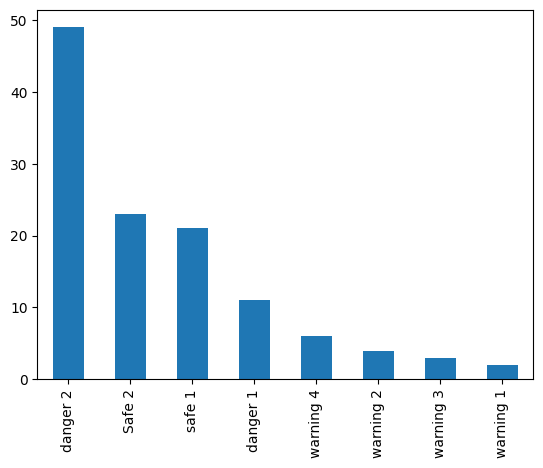

In [48]:
df['cluster'].value_counts().plot(kind='bar')

# Correlation

In [47]:
# Menggunakan Metode Statistik
# Misalnya, menggunakan uji ANOVA
import scipy.stats as stats

grouped_data = df.groupby('cluster')
anova_result_total = stats.f_oneway(grouped_data.get_group('safe 1')['Total'],
                              grouped_data.get_group('Safe 2')['Total'],
                              grouped_data.get_group('warning 1')['Total'],
                              grouped_data.get_group('warning 2')['Total'],
                              grouped_data.get_group('warning 3')['Total'],
                              grouped_data.get_group('warning 4')['Total'],
                              grouped_data.get_group('danger 1')['Total'],
                              grouped_data.get_group('danger 2')['Total'],
                              )

anova_result_Rentang_Greentick = stats.f_oneway(grouped_data.get_group('safe 1')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('Safe 2')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('warning 1')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('warning 2')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('warning 3')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('warning 4')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('danger 1')['Rentang Greentick Ke Juni 2023'],
                              grouped_data.get_group('danger 2')['Rentang Greentick Ke Juni 2023'],
                              )

anova_result_Rata = stats.f_oneway(grouped_data.get_group('safe 1')['Rata-rata'],
                              grouped_data.get_group('Safe 2')['Rata-rata'],
                              grouped_data.get_group('warning 1')['Rata-rata'],
                              grouped_data.get_group('warning 2')['Rata-rata'],
                              grouped_data.get_group('warning 3')['Rata-rata'],
                              grouped_data.get_group('warning 4')['Rata-rata'],
                              grouped_data.get_group('danger 1')['Rata-rata'],
                              grouped_data.get_group('danger 2')['Rata-rata'],
                              )

print('Nilai p-value Total\t\t:', anova_result_total.pvalue, 
      '\nNilai p-value Rentang Greentick\t:', anova_result_Rentang_Greentick.pvalue, 
      '\nNilai p-value Rata-rata\t\t:', anova_result_Rata.pvalue)

Nilai p-value Total		: 0.05847669743361482 
Nilai p-value Rentang Greentick	: 2.2155457042111873e-21 
Nilai p-value Rata-rata		: 0.009935936573938446


based on anova score, i found that column "Total" and "Rata-rata" is the most correlated column with target column (CLUSTER)